# Installing and Importing necessary libraries

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score, KFold,GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, classification_report, roc_auc_score, confusion_matrix

# Importing the dataset

In [4]:
fire = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A16 Neural Network\\forestfires.csv")
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## Dataset : fireforests

* PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS.

# Basic Information about the dataset

In [5]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing

### 1. Pooling the months into categories

Instead of taking all the months separetely, we shall pool them into two categories, i.e. whether it was summer or not. The reason for this is that the instances of forest fires shoots up during the summer. The data is of a national park which is situated in Portugal. And Portugal faces summer from June to September. Hence, we pooled the entire data accordingly.

Text(0.5, 1.0, 'Count plot of whether it was summer vs whether it was not summer')

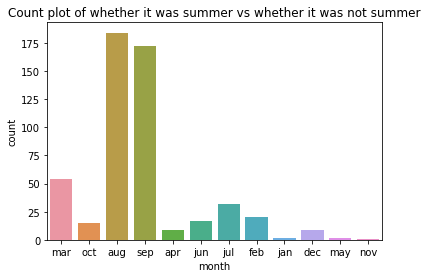

In [7]:
sns.countplot(fire['month'])
plt.title('Count plot of whether it was summer vs whether it was not summer')

The graph also shows that the instances of forest fires are the highest during August and September.

In [8]:
# converting to is summer
fire['month'] = ((fire['month'] == 'jun') | (fire['month'] == 'jul') | (fire['month'] == 'aug') | (fire['month'] == 'sep'))
# renaming column
fire = fire.rename(columns = {'month' : 'is_summer'})

Text(0.5, 1.0, 'Count plot of whether it was summer vs whether it was not summer')

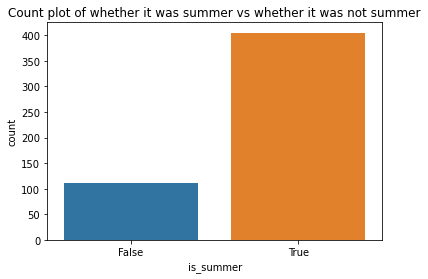

In [9]:
# visualizing
sns.countplot(fire['is_summer'])
plt.title('Count plot of whether it was summer vs whether it was not summer')

The visualizion also tells us that the instances of forest fires are really high during the summer.

### 2. Pooling the days into categories

Instead of taking all the days separetely, we shall pool them into two categories, i.e., whether it was a weekend or not. The reason for doing so is that, during the weekends, due to the late response from the fire department, the instances of forest fires might have increased.

Text(0.5, 1.0, 'Count plot of whether it was summer vs whether it was not summer')

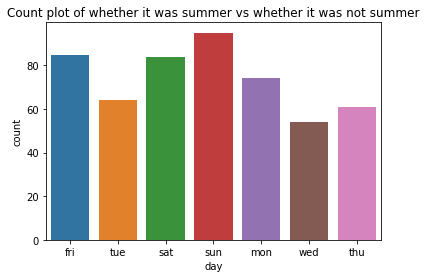

In [10]:
sns.countplot(fire['day'])
plt.title('Count plot of whether it was summer vs whether it was not summer')

The visualization also shows that the instances of forest fires are more during weekends.

In [11]:
# converting to is weekend
fire['day'] = ((fire['day'] == 'sun') | (fire['day'] == 'sat'))
# renaming column
fire = fire.rename(columns = {'day' : 'is_weekend'})

Text(0.5, 1.0, 'Count plot of weekend vs weekday')

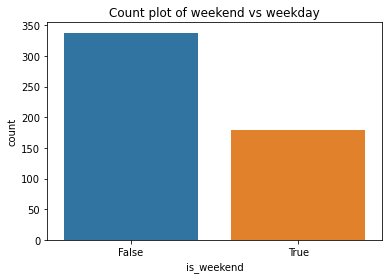

In [12]:
# visualizing
sns.countplot(fire['is_weekend'])
plt.title('Count plot of weekend vs weekday')

Despite of the inequality of 2 to 5 in the weekdays, the skew is not so large, which proves that the instances of forest fires were more during the weekends.

### 3. Removing unnecessary columns

In [13]:
fire.columns

Index(['is_summer', 'is_weekend', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun',
       'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec',
       'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay',
       'monthnov', 'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [14]:
fire.drop(fire[['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep']], inplace=True, axis=1)

This is how our data looks after the modifications.

In [15]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   is_summer      517 non-null    bool   
 1   is_weekend     517 non-null    bool   
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: bool(2), float64(8), int64(1), object(1)
memory usage: 41.5+ KB


### 4. Dependent Variable

In [16]:
fire["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

* Here data is imbalance.

In [18]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(fire["size_category"])

### 5. Independent Variables

In [19]:
x=fire.drop(['size_category'], axis=1) 

### 6. Scaling the data

In [20]:
scaler = MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns, index=x.index)
x

,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.0,0.0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.0,0.0,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.0,1.0,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.0,0.0,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.0,1.0,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
512,1.0,1.0,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
513,1.0,1.0,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
514,1.0,1.0,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
515,1.0,1.0,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


### 7. Resampling

Seeing to the value counts of the dependent variable we can say that the data is highly imbalanced. Hence we shall first make it balanced.

In [21]:
x= np.array(x)
y= np.array(y)

In [22]:
over_sampler = SMOTE(random_state=42)
x_res, y_res = over_sampler.fit_resample(x, y)

### 8. Splitting the data into Training and Testing

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=42)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(529, 11)
(227, 11)
(529,)
(227,)


The data is now ready to be feed into the model.

## Using Grid Search to find best Parameter:

In [30]:
# Defining the model

def create_model(activation_function,init,learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init,learning_rate = learning_rate, dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 100)
grid_result = grid.fit(x_train,y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001
[CV 1/5; 1/108] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001;, score=0.528 total time=   0.9s
[CV 2/5; 1/108] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001
[CV 2/5; 1/108] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001;, score=0.509 total time=   0.7s
[CV 3/5; 1/108] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001
[CV 3/5; 1/108] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001;, score=0.443 total time=   0.7s
[CV 4/5; 1/108] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001
[CV 4/5; 1/108] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001;, score=0.594 total ti

In [45]:
grid_result.best_params_ 

{'activation_function': 'linear',
 'dropout_rate': 0.2,
 'init': 'normal',
 'learning_rate': 0.1}

# Creating the model

In [80]:
model = Sequential()
model.add(Dense(8, input_dim=11, activation='linear'))
model.add(Dense(4, activation='linear'))
model.add(Dense(6, activation='linear'))
model.add(Dense(1, activation = 'sigmoid'))

In [60]:
# model = grid_result.best_estimator_.model
# model

In [81]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_1088"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2173 (Dense)          (None, 8)                 96        
                                                                 
 dense_2174 (Dense)          (None, 4)                 36        
                                                                 
 dense_2175 (Dense)          (None, 6)                 30        
                                                                 
 dense_2176 (Dense)          (None, 1)                 7         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


* We created a sequential model with 2 hidden layers, having 6 nodes, and 1 output layer.
* Input dimension = 11 ; As we have 11 features in the dataset.
* The output layer has only one node, as we are dealing with binary classification, and the model will give us the probablities.
* We are using 'linear' as the Activation Function in the hidden layer, and at the final layer we used 'sigmoid' Activation Function, as this is the case of binary classification.
* The model will be compiled on 'adam' optimizer as 'accuracy' as its evaluating metrics and 'binary_crossentropy' as loss.

# Model fitting

In [83]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 11, epochs = 100, verbose=0)
# history.history['accuracy']
# epochs=100 ; which means the data will be passed in the neural network for 100 times.
# batch_size = 11 ; which means that everytime the data will be passed in the batches of 11 data points.

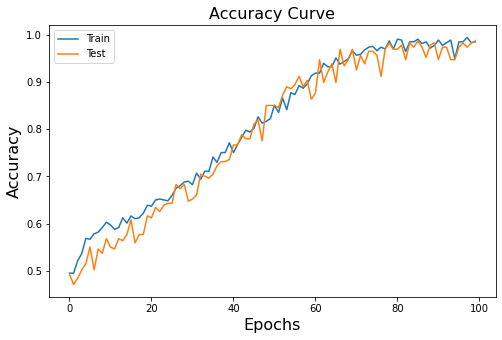

In [84]:
# Visualizing the training and testing loss at epochs=100
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curve', fontsize=16)
plt.show()

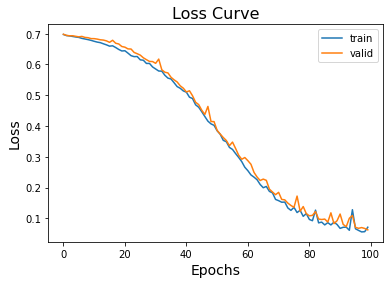

In [85]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curve', fontsize=16)
plt.show()

In [86]:
# making predictions
y_pred = pd.DataFrame((model.predict(x_test)>0.5).astype("int32"))

8/8 [==============================] - 0s 1ms/step


# Model Evaluation

In [87]:
# Traing and Testing accuracy
print("Training Accuracy : ", model.evaluate(x_train, y_train, verbose=0)[1])
print("Testing Accuracy : ",model.evaluate(x_test, y_test, verbose=0)[1])

Training Accuracy :  0.9886578321456909
Testing Accuracy :  0.9867841601371765


[[106   0]
 [  3 118]]


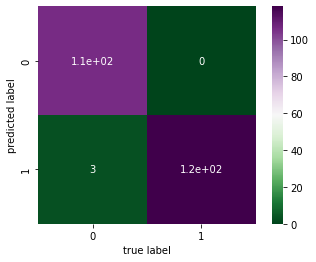

In [88]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, square=True, annot=True, cmap='PRGn_r')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [91]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       106
           1       1.00      0.98      0.99       121

    accuracy                           0.99       227
   macro avg       0.99      0.99      0.99       227
weighted avg       0.99      0.99      0.99       227



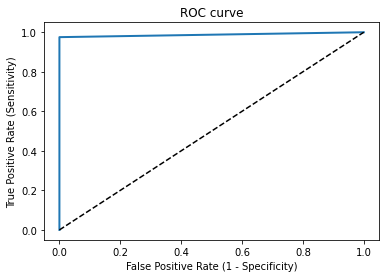

Model AUC score: 0.9876033057851239


In [90]:
# AUC and ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
print(f'Model AUC score: {roc_auc_score(y_test, y_pred)}')